In [81]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/malgunbd.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline
# Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Î∞îÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Í∑∏Î¶∞Îã§.
from tqdm import tqdm

from nltk import FreqDist
from nltk import bigrams, word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud

from konlpy.tag import Okt

okt = Okt()

In [40]:
banksalad = pd.read_pickle('banksalad_review.pkl')

In [44]:
#ÎÇ†Ïßú ÌòïÌÉú Î≥ÄÍ≤Ω
banksalad['ÎÇ†Ïßú'] = banksalad['ÎÇ†Ïßú'].apply(lambda x: ('-').join(re.findall('[0-9]+', x)))
banksalad['ÎÇ†Ïßú'] = pd.to_datetime(banksalad['ÎÇ†Ïßú'])

banksalad['Í∞ÑÍ≤©'] = banksalad['Í∞ÑÍ≤©'].apply(lambda x: ('-').join(re.findall('[0-9]+', x)) if x != 'N' else 'N')

#Ï†ÑÏ≤¥ Î¶¨Î∑∞Ïóê ÎåÄÌïú ÎãµÎ≥Ä Î¶¨Î∑∞ ÎπÑÏú® ÌôïÏù∏
print('ÎãµÎ≥ÄÏú®: {}'.format(len(banksalad[banksalad['ÎãµÏó¨Î∂Ä'] == 'Y']) / len(banksalad) * 100))

ÎãµÎ≥ÄÏú®: 99.37304075235109


In [45]:
#ÎãµÎ≥ÄÏù¥ ÏûàÎäî Î¶¨Î∑∞ÏóêÏÑú ÎãµÎ≥ÄÍπåÏßÄÏùò Í∏∞Í∞Ñ ÌôïÏù∏
bank_reply = banksalad[banksalad['ÎãµÏó¨Î∂Ä'] != 'N']
bank_reply['Í∞ÑÍ≤©'] = pd.to_datetime(bank_reply['Í∞ÑÍ≤©'])

bank_reply['Í∏∞Í∞Ñ'] = bank_reply['Í∞ÑÍ≤©'] - bank_reply['ÎÇ†Ïßú']
bank_reply['Í∏∞Í∞Ñ'] = bank_reply['Í∏∞Í∞Ñ'].apply(lambda x: x.days) #datetime methodÏóêÏÑú ÎÇ†Ïßú Ï∂îÏ∂ú

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [47]:
#Î¶¨Î∑∞Ïóê ÎåÄÌïú Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏÇ¨Ïùò ÎãµÎ≥ÄÏù¥ Ìï¥Îãπ Î¶¨Î∑∞Î≥¥Îã§ Îπ®Î¶¨ ÏûëÏÑ±Îêú Ïò§Î•òÍ∞Ä Ï°¥Ïû¨
bank_reply[bank_reply['Í∏∞Í∞Ñ'] < 0]

Î¶¨Î∑∞         ÎÇ†Ïßú ÎãµÏó¨Î∂Ä  \
24  Î±ÖÌÅ¨ÏÉêÎü¨ÎìúÎ•º Í∞ÄÍ≥ÑÎ∂Ä Ïñ¥ÌîåÎ°ú Ïûò ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏñ¥Ïöî. Í∞ÄÍ≥ÑÎ∂Ä Îã¨Î†•ÏóêÏÑú Ï£ºÍ∞Ñ,ÏõîÍ∞Ñ Î¶¨Î∑∞Î•º ... 2020-11-26   Y   

           Í∞ÑÍ≤©  Í∏∞Í∞Ñ  
24 2020-11-23  -3

In [48]:
#Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùò Î¶¨Î∑∞ ÎãµÎ≥Ä ÌèâÍ∑†Ïùº
bank_reply[bank_reply['Í∏∞Í∞Ñ'] >= 0].mean()

Í∏∞Í∞Ñ    1.287975
dtype: float64

# ÌÇ§ÏõåÎìú ÏÇ∞Ï∂ú

In [50]:
def show_wc(df):
    okt_tokens = []
    review_list = list(df['Î¶¨Î∑∞'])
    for token in review_list:
        #ÏòÅÏñ¥ Ï†úÍ±∞
        token = re.sub('([a-zA-Z])','',token)
        #ÏûêÏùå, ÌòπÏùÄ Î™®ÏùåÎßå ÏûàÎäî Î¨∏Ïûê Ï†úÍ±∞
        token = re.sub('[„Ñ±-„Öé„Öè-„Ö£]+','',token)
        #ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
        token = re.sub('[-=+,#/\?:^$.@*\"‚Äª~&%„Üç!„Äè\\‚Äò|\(\)\[\]\<\>`\'‚Ä¶;„Äã\n]','',token)
        #Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú
        okt_tokens.append(okt.nouns(token))

    #ÎπàÎèÑÏàò Í∏∞Ï§ÄÏúºÎ°ú Îã®Ïñ¥ Ï∂îÏ∂ú
    vocab = FreqDist(np.hstack(okt_tokens))

    #ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
    wc = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path='C:/Windows/Fonts/malgunbd.ttf')
    plt.figure(figsize=(20,10))
    plt.imshow(wc.generate_from_frequencies(vocab))
    plt.axis("off")
    plt.show()
    
    vocab = vocab.most_common(100)
    return vocab

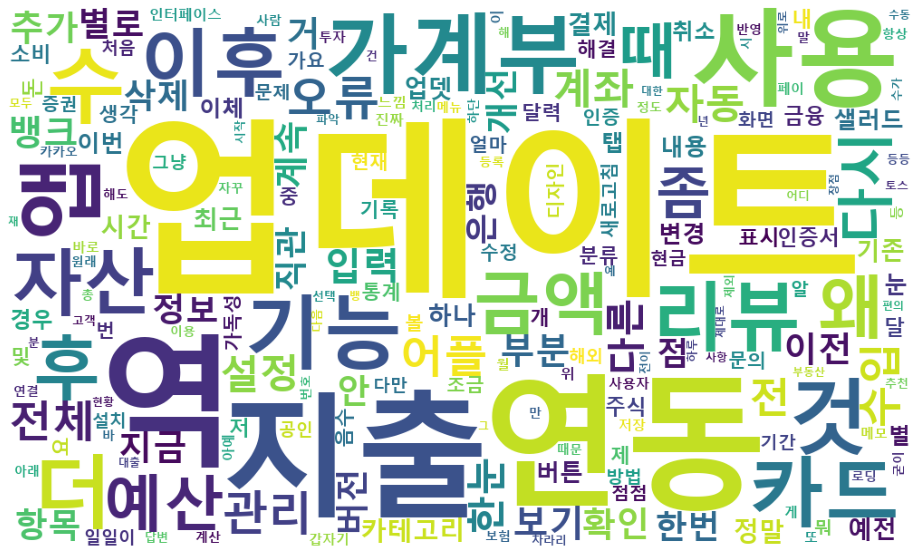

In [51]:
bank_vocab = show_wc(banksalad)

In [69]:
columns = ['vocab', 'count']
word_df = pd.DataFrame(columns=columns)

words = []
cnts = []

for word, cnt in bank_vocab:
    words.append(word)
    cnts.append(cnt)
    
word_df['vocab'] = words
word_df['count'] = cnts

word_df.set_index('vocab', inplace=True)

<BarContainer object of 50 artists>

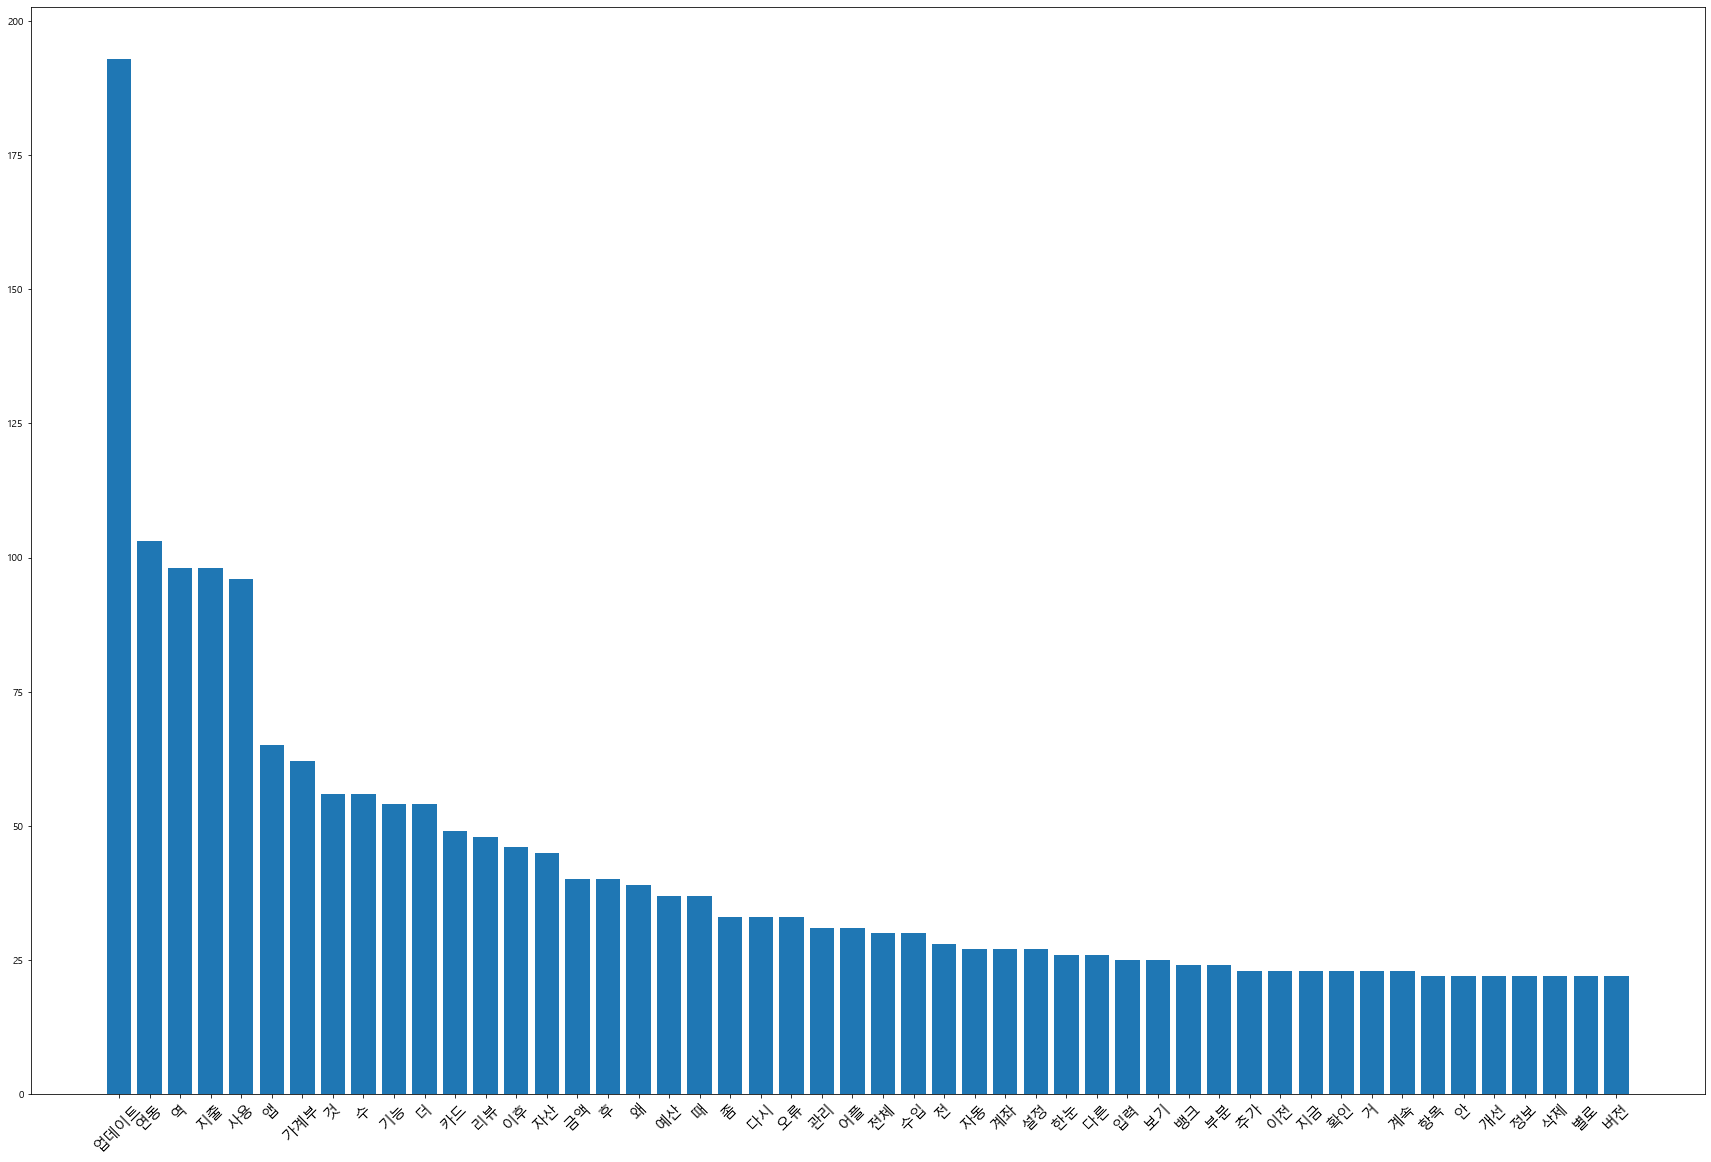

In [101]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=45, size=15)
plt.bar(word_df.index[:50], word_df['count'].iloc[:50])

In [108]:
def find_review(keyword):
    rev_all = []
    for rev in banksalad['Î¶¨Î∑∞']:
        if keyword in rev:
            rev_all.append(rev)
    print(rev_all)

In [109]:
find_review('ÏóÖÎç∞Ïù¥Ìä∏')

['Ïû•Ï†ê 1. ÏûêÎèôÏúºÎ°ú Í∞ÄÍ≥ÑÎ∂ÄÎ•º Ïç®Ï£ºÍ≥† ÌèâÍ∞Ä 2. Í≥ÑÏ¢åÏó∞Îèô 3. Ìà¨ÏûêÏï°, ÏßëÍ∞íÎì± ÎπÑÌòÑÍ∏àÏÑ±ÏûêÏÇ∞ÍπåÏßÄ Ïó∞Îèô 4. Ïπ¥ÎìúÏ∂îÏ≤ú 5. Îπ†Î•∏ Î¨∏Ï†úÌï¥Í≤∞Í≥º ÏóÖÎç∞Ïù¥Ìä∏ 6. Í∞ÑÎã®ÌïòÍ≥† ÏßÅÍ¥ÄÏ†ÅÏù∏ ÏÇ¨Ïö©Î∞©Î≤ï Îã®Ï†ê 1. Ïó∞ÎèôÎ°úÎî©Ïù¥ ÎäêÎ¶º 2. ÎøúÎπ†Ïù¥ ÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ ÏóÖÎéÉÌï† Ïàò ÏûàÎäî Ï∂îÍ∞Ä ÏÑ†ÌÉùÏßÄÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå (ÏòàÏÇ∞Ïóê Ïû°ÌòÄÏÑú Ïã§Ï†ú ÏòàÏÇ∞ ÏñºÎßàÎÇò ÏçºÎäîÏßÄÍ∞Ä ÏóÖÎéÉÏù¥ ÏïàÎê®) 3. Ïπ¥Ïπ¥Ïò§Î±ÖÌÅ¨ ÎåÄÏ∂úÏùÄ Ïó∞ÎèôÏïàÎê®', 'ÏóÖÎç∞Ïù¥Ìä∏ Ïù¥ÌõÑ ÎÑàÎ¨¥ Î∂àÌé∏Ìï¥Ï°åÏñ¥Ïöî. Ïù¥Ï†ÑÏóêÎäî ÏÇ¨Ïö©Ïù¥ ÏßÅÍ¥ÄÏ†ÅÏù¥Îùº Ìé∏ÌñàÎäîÎç∞ ÏßÄÍ∏àÏùÄ ÏßÄÏ∂ú/ÏàòÏûÖ/Ïù¥Ï≤¥Ïùò ÏÉâÍπîÎèÑ ÎÑàÎ¨¥ ÎπÑÏä∑Ìï¥ÏÑú ÌïúÎààÏóê Î≥¥Í∏∞ ÌûòÎì§Í≥† Í∏∞ÌÉÄ Ïó¨Îü¨Í∞ÄÏßÄ Í∏∞Îä•Îì§ÎèÑ Ïì∞Í∏∞Í∞Ä Î∂àÌé∏Ìï©ÎãàÎã§. Îã§Î•∏ ÏÇ¨Ïö©ÏûêÎì§ÎèÑ Ïù¥Îü∞ ÏùòÍ≤¨Ïù¥ ÎßéÏùÄÍ±∞ Í∞ôÏùÄÎç∞, Ï¢Ä ÏóâÎö±ÌïòÍ≤å ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê† ÏóÖÎç∞Ïù¥Ìä∏Î•º ÌïúÎìØ Ïã∂Ïñ¥Ïöî. Ïù¥Ï†ÑÏúºÎ°ú ÎêòÎèåÎ†∏ÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§Ïöî „Ö†„Ö†', 'Ïûò ÏÇ¨Ïö©Ï§ëÏûÖÎãàÎã§. Ïù¥Î≤à ÏóÖÎç∞Ïù¥Ìä∏ ÎßêÍ≥† Ï†ÄÎ≤à ÏóÖÎç∞Ïù¥Ìä∏ Ï†Ñ Î≤†ÌÉÄÏãúÏä§ÌÖúÏù